In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import librosa as lr
import librosa.display
import IPython.display as ipd
from PIL import Image
import os

In [7]:
data_dir = "./audio"
audio_files = glob(data_dir + "/*.wav")

In [9]:
data = pd.DataFrame()
Emotion = []
Emotional_Intensity = []
Statement = []
Statement_Text = []
Repetition = []
Actor = []

In [10]:
for i in range(len(audio_files)):
    temp = audio_files[i][audio_files[i].index("\\")+1:audio_files[0].index(".wav")].split("-")
    
    # creating Emotion
    if temp[2] == "01":
        Emotion.append(1)
    if temp[2] == "02":
        Emotion.append(2)
    if temp[2] == "03":
        Emotion.append(3)
    if temp[2] == "04":
        Emotion.append(4)
    if temp[2] == "05":
        Emotion.append(5)
    if temp[2] == "06":
        Emotion.append(6)
    if temp[2] == "07":
        Emotion.append(7)
    if temp[2] == "08":
        Emotion.append(8)

   ############################

    # creating Emotinal_Intensity
    if temp[3] == "01":
        Emotional_Intensity.append(1)
    if temp[3] == "02":
        Emotional_Intensity.append(2)
        
   #############################

    # creating Statement
    if temp[4] == "01":
        Statement.append(1)
        Statement_Text.append("Kids are talking by the door")
    if temp[4] == "02":
        Statement.append(2)
        Statement_Text.append("Dogs are sitting by the door")
        
    ############################
    
    # creating Repetition
    if temp[5] == "01":
        Repetition.append(1)
    if temp[5] == "02":
        Repetition.append(2)
        
    ###########################
    
    # creating actor gender
    if int(temp[6])%2 == 0:   # even --> female
        Actor.append(1)
    if int(temp[6])%2 == 1:   # odd --> male
        Actor.append(0)    


In [15]:
data["Emotion"] = Emotion
data["Emotional_Intensity"] = Emotional_Intensity
data["Statement"] = Statement
data["Statement_Text"] = Statement_Text
data["Repetition"] = Repetition
data["Actor_Gender"] = Actor

In [22]:
#function for creating amplitude images for audios
def graph_amplitude(audio):
    audio_files, sfreq_files = lr.load(audio)
    time_files = np.arange(0, len(audio_files)) / sfreq_files
    fig, ax = plt.subplots()
    ax.plot(time_files, audio_files, color="darkblue")
    ax.set(xlabel="Time(s)", ylabel="Sound Amplitude")
    plt.savefig(audio[8:-4]+".png")

In [17]:
def normalize_gray(array):
    return (array - array.min())/(array.max() - array.min())

In [18]:
#resizing amplitude images and converting gray level
def resize(image_file):
    img_org = Image.open(image_file).convert("L")
    width_org, height_org = img_org.size
    factor = 0.20
    width = int(width_org * factor)
    height = int(height_org * factor)
    img_anti = img_org.resize((width, height), Image.ANTIALIAS)
    new_image_file = "%s%s" % (name,ext)
    img_anti.save(new_image_file)

In [ ]:
for i in audio_files:
    graph_amplitude(i)  

In [ ]:
data_dir1 = "./amplitudes"
amplitude_images = glob(data_dir1 + "/*.png")
for i in amplitude_images:
    resize(i)

In [31]:
#creating input
dataset = []
for i in amplitude_images:
    myTemp = Image.open(i)
    myArray = normalize_gray(np.asarray(myTemp, dtype="float32"))
    dataset.append(myArray)

In [37]:
from sklearn.model_selection import train_test_split
from matplotlib import pyplot

In [103]:
X_train, X_test, y_train, y_test = train_test_split(dataset,data["Emotion"].to_numpy(), test_size=0.30, random_state=42,shuffle=True)

In [110]:
X_train = np.array(X_train).reshape(len(X_train),86,57,1)
X_test = np.array(X_test).reshape(len(X_test),86,57,1)

Train on 1008 samples, validate on 432 samples
Epoch 1/10
1008/1008 [==============================] - 16s 16ms/step - loss: 2.1630 - accuracy: 0.1518 - val_loss: 1.9744 - val_accuracy: 0.2060
Epoch 2/10
1008/1008 [==============================] - 15s 15ms/step - loss: 1.8286 - accuracy: 0.3075 - val_loss: 1.8285 - val_accuracy: 0.3125
Epoch 3/10
1008/1008 [==============================] - 16s 16ms/step - loss: 1.6396 - accuracy: 0.3889 - val_loss: 1.7785 - val_accuracy: 0.3148
Epoch 4/10
1008/1008 [==============================] - 16s 16ms/step - loss: 1.5009 - accuracy: 0.4534 - val_loss: 1.8085 - val_accuracy: 0.3380
Epoch 5/10
1008/1008 [==============================] - 15s 15ms/step - loss: 1.4067 - accuracy: 0.4871 - val_loss: 1.7835 - val_accuracy: 0.3588
Epoch 6/10
1008/1008 [==============================] - 15s 15ms/step - loss: 1.2420 - accuracy: 0.5645 - val_loss: 1.7787 - val_accuracy: 0.3495
Epoch 7/10
1008/1008 [==============================] - 15s 15ms/step - loss:

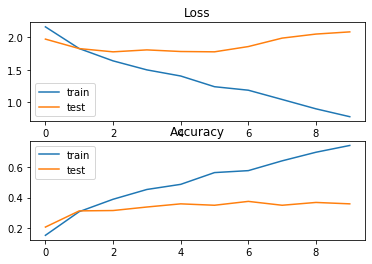

In [93]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

#creating model
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation="relu", input_shape=(86,57,1)))
model.add(Conv2D(16, kernel_size=3, activation="relu"))
model.add(Flatten())
model.add(Dense(9, activation="softmax"))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [133]:
train = np.array(train).reshape(-1,86,57,1)
test = np.array(test).reshape(-1,86,57,1)

In [134]:

from keras.models import Model
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(train[10].reshape(1,86,57,1))

def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index = 0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

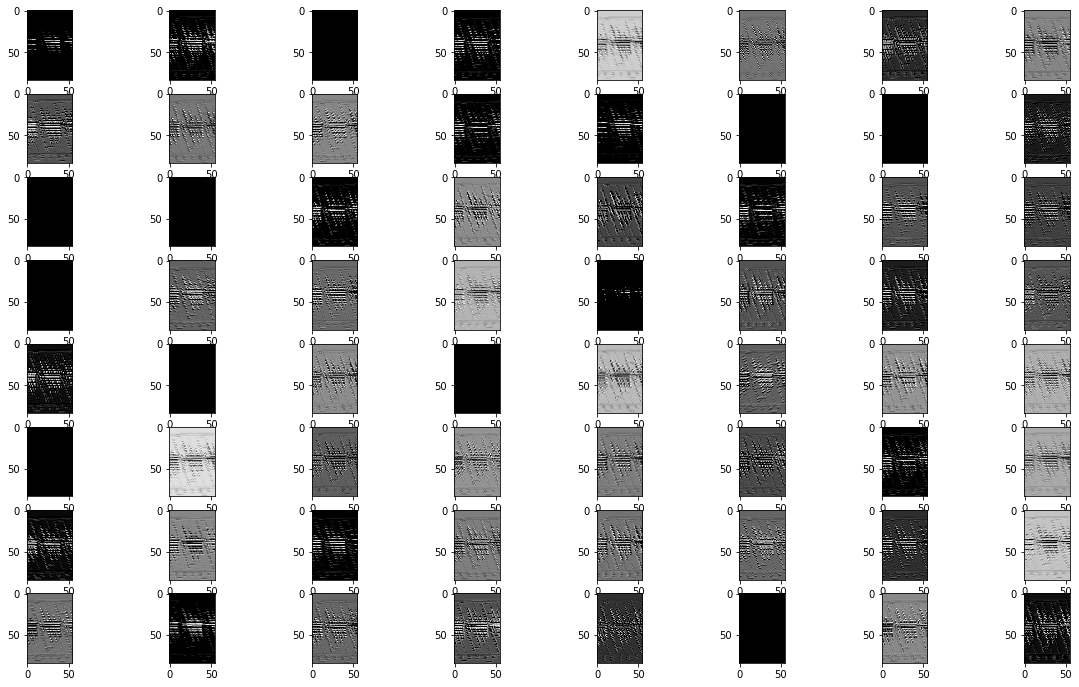

In [135]:
display_activation(activations, 8, 8, 0)  #Visualized weights for layer 0